In [1]:
# Loading important modeules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading our .csv file 

In [4]:
df1=pd.read_csv('Bengaluru_house_data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

#  Data cleaning

In [6]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# Cheaking my data samples using area type feature

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df2=df1.drop(['area_type','society','balcony','availability'],axis=1)

In [10]:
df3=df2.dropna()

In [11]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
df3['BHK']= df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.BHK.unique()

<ipython-input-14-a053b4c6ec81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']= df3['size'].apply(lambda x : int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [18]:
df3['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return 

In [20]:
#df3[ ~ df3['total_sqft'].apply(is_float)].head(10)

In [21]:
# As we can see some differnt pattern in total_sqft

In [22]:
def value_correction(x):
    value_y=x.split('-')
    if len(value_y)==2:
        avg = (float(value_y[0])+float(value_y[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [23]:
value_correction('20-50')

35.0

In [24]:
df3['total_sqft'] = df3['total_sqft'].apply(value_correction)

<ipython-input-24-4d0431131a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(value_correction)


In [25]:
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

# Feature engineering

In [27]:
# Creating new feature

In [28]:
df3['Price_per_sq_feet'] = df3['price'] *100000/ df3['total_sqft']

<ipython-input-28-3d42c9b38f53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price_per_sq_feet'] = df3['price'] *100000/ df3['total_sqft']


In [29]:
df3

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [30]:
df5_stats = df3['Price_per_sq_feet'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: Price_per_sq_feet, dtype: float64

In [31]:
len(df3['location'].unique())

1304

In [32]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

/Users/vipulsemwal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
len(location_stats[location_stats<=10])

1052

In [34]:
location_stats_less_then_10 = location_stats[location_stats<=10]

In [35]:
location_stats_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [36]:
len(df3['location'].unique())

1293

In [37]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df3.location.unique())

242

In [38]:
df3

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# Outlier detection  and remover

In [39]:
df3[(df3.total_sqft/df3.BHK)<300].head()

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
#df3.Price_per_sq_feet.describe().apply(lambda x: format(x, 'f'))

In [41]:
type(df3.BHK[0])

numpy.int64

In [42]:
# Removing outlier using value of total square feet upon BHK so if the value is less then 300, we remove it

In [43]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]

In [44]:
df4

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [45]:
df4.Price_per_sq_feet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sq_feet, dtype: float64

In [46]:
# We are going to use standard deviation on price_per_sq_feet

In [47]:
print(df4.groupby('location'))

In [48]:
def remove_per_sq_ft_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key,value in df.groupby('location'):
        
        mean_v=np.mean(value.Price_per_sq_feet)
        
        std_v=np.std(value.Price_per_sq_feet)
        
        df_after_outliers=value[(value.Price_per_sq_feet>(mean_v-std_v))&(value.Price_per_sq_feet<(mean_v+std_v))]
        
        df_out = pd.concat([df_out,df_after_outliers],ignore_index=True)
        
    return df_out
        

In [49]:
df5=remove_per_sq_ft_outliers(df4)
df5.shape

(10241, 7)

In [50]:
df5

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [51]:
df5.groupby('BHK').sum()

,total_sqft,bath,price,Price_per_sq_feet
BHK,,,,
1,367911.230,550.0,18921.420,2.677131e+06
2,5418881.995,9436.0,279019.860,2.421790e+07
3,6635374.070,10988.0,412037.075,2.380772e+07
4,2209136.410,3090.0,169731.280,5.696040e+06
5,336141.000,518.0,24475.500,8.183216e+05
6,219629.000,360.0,15115.000,4.479784e+05
7,78856.000,130.0,5073.000,9.854787e+04
8,55950.000,112.0,3150.000,9.269454e+04
9,33600.000,70.0,1761.000,4.192120e+04


In [52]:
import matplotlib
def plot_scatter(df,location):
    bedroom_bhk2 = df[(df.location==location) & (df.BHK== 2)]
    bedroom_bhk3 = df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bedroom_bhk2.total_sqft,bedroom_bhk2.price,color='red',label='2bhk',s=50)
    plt.scatter(bedroom_bhk3.total_sqft,bedroom_bhk3.price,color='blue',marker='+',label='3bhk',s=50)
    plt.xlabel('total sq feet area')
    plt.ylabel('price per square feeet')
    plt.title(location)
    plt.legend()

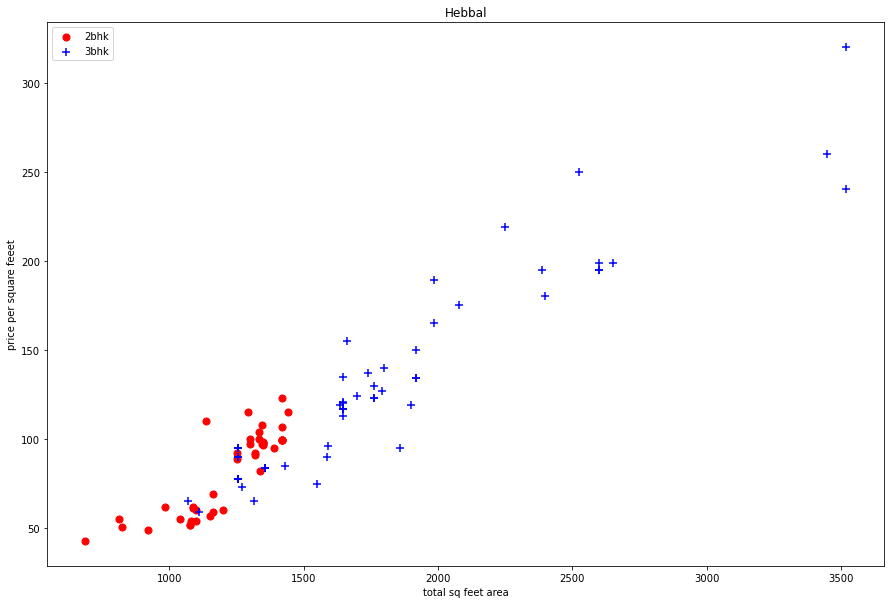

In [53]:
plot_scatter(df5,'Hebbal')

In [54]:
def remove_bhk_outliers(df):
    exclude_values = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.Price_per_sq_feet),
                'std': np.std(bhk_df.Price_per_sq_feet),
                'count': bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('BHK'):
            previous = bhk_stats.get(bhk-1)
            if previous and previous['count']>5:
                exclude_values = np.append(exclude_values,bhk_df[bhk_df.Price_per_sq_feet<(previous['mean'])].index.values)
    return df.drop(exclude_values,axis='index')

df6= remove_bhk_outliers(df5)
df6.shape

(7329, 7)

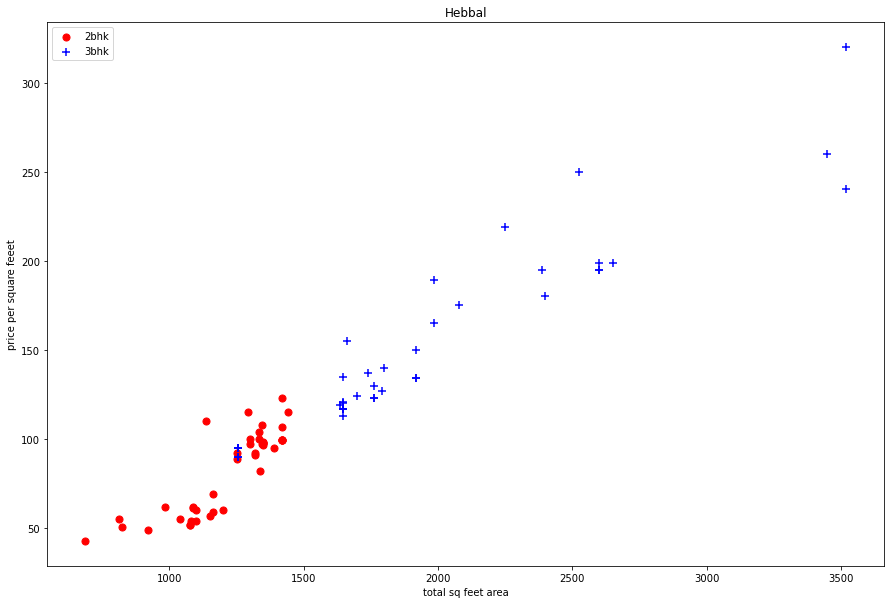

In [55]:
plot_scatter(df6,'Hebbal')

In [56]:
import seaborn as sns

<AxesSubplot:xlabel='Price_per_sq_feet', ylabel='Count'>

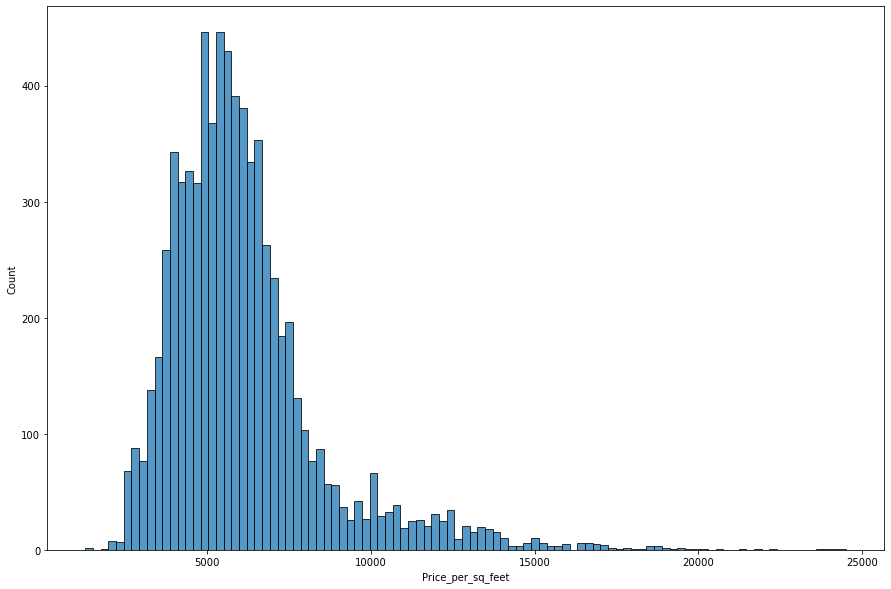

In [57]:
sns.histplot(data=df6, x= df6.Price_per_sq_feet)

Text(0, 0.5, 'count')

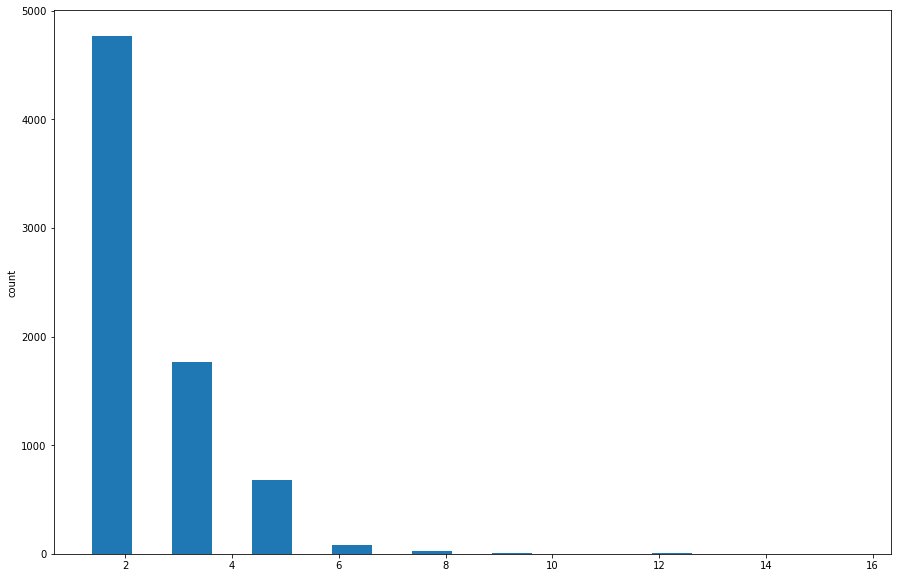

In [58]:
plt.hist(df6.bath,rwidth=0.5)
plt.xlabel=('number of bathrooms')
plt.ylabel('count')

In [59]:
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,Price_per_sq_feet
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [60]:
df7=df6[df6.bath<df6.BHK+2]
df7.shape

(7251, 7)

In [61]:
df8 = df7.drop(['size','Price_per_sq_feet'],axis=1)

In [62]:
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [63]:
len(df8.location)

7251

In [64]:
len(df8.location.unique())

242

In [65]:
# Building model

In [66]:
dummies= pd.get_dummies(df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df9=pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df10=df9.drop('location',axis=1)
df10

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
x= df10.drop('price',axis=1)
y= df10.price

In [70]:
x

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [74]:
model_lr=LinearRegression()

In [75]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [76]:
model_lr.score(x_test,y_test)

0.8452277697874335

In [77]:
model_lr.predict(x_test)

array([70.47896311, 33.09312356, 36.00433051, ..., 29.45805298,
       58.43306285, 68.60105208])

In [78]:
ss_cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
model_cvs=cross_val_score(LinearRegression(),x,y,cv=ss_cv)


In [79]:
model_cvs

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [80]:
np.mean(model_cvs)

0.8183540750695935

In [81]:
def model_selecion(X,Y):
    algo_score = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize' : [False],
                'fit_intercept':[True]    
            }
        },
        'Lasso':{
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic'],
                 'normalize':[False,True],
                 'precompute':[False,True]   
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': { 
            'alpha':[1,2],
            'fit_intercept':[True,False]    
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    
    ss_cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , configuration in algo_score.items():
        gs_cv = GridSearchCV(configuration['model'],configuration['params'],cv=ss_cv,return_train_score=False)
        gs_cv.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs_cv.best_score_,
            'best_params':gs_cv.best_params_
        })
        
    return pd.DataFrame(data=scores, columns=['model','best_score','best_params'])
        
    

In [82]:
model_selecion(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,"{'fit_intercept': True, 'normalize': False}"
1,Lasso,0.687475,"{'alpha': 1, 'normalize': False, 'precompute':..."
2,Ridge,0.819642,"{'alpha': 1, 'fit_intercept': False}"
3,decision_tree,0.716861,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [86]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    new=np.zeros(len(x.columns))
    new[0]=sqft
    new[1]=bath
    new[2]=bhk
    if loc_index>=0:
        new[loc_index]=1
        
    return model_lr.predict([new])[0]

In [89]:
predict_price('1st Phase JP Nagar',1000,3,3)

86.80519395216024

In [93]:
import pickle
with open('Home_price_prediction_model.pickle','wb') as f:
    pickle.dump(model_lr,f)

In [92]:
import json

columns ={
    'data_columns': [col_name.lower() for col_name in x.columns]
}

with open('location_columns.json','w') as f:
    f.write(json.dumps(columns))